# 一维DP

## 639. 解码方法 II  
https://leetcode-cn.com/problems/decode-ways-ii/  

dp[i] 由 dp[i-1] 和 dp[i-2]) 推得
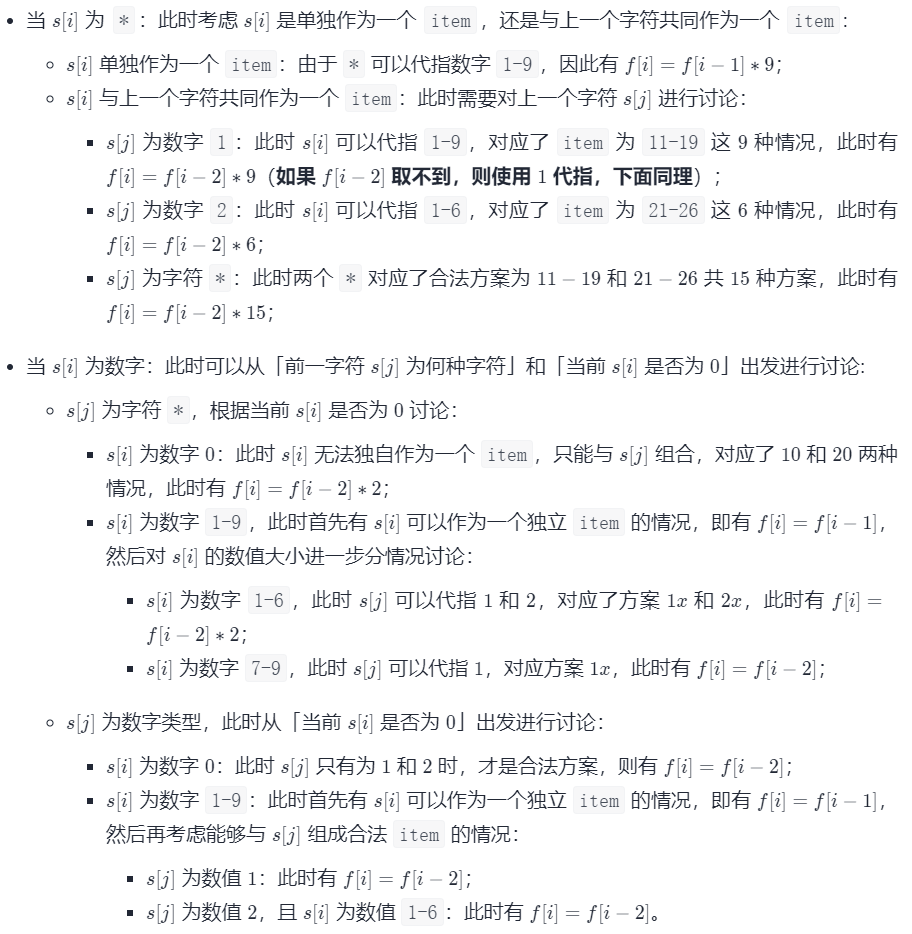

In [3]:
s = "*10*1"

dp = [0 for _ in range(len(s))]
if s[0] == '*':
    dp[0] = 9
elif s[0] in set([str(ii) for ii in range(1,10)]):
    dp[0] = 1

for ii in range(1,len(s)):
    if s[ii] == '*':
        dp[ii] += dp[ii-1]*9
        if s[ii-1] == '1':
            if ii-2 >= 0:
                dp[ii] += dp[ii-2]*9
            else:
                dp[ii] += 9
        elif s[ii-1] == '2':
            if ii-2 >= 0:
                dp[ii] += dp[ii-2]*6
            else:
                dp[ii] += 6
        elif s[ii-1] == '*':
            if ii-2 >= 0:
                dp[ii] += dp[ii-2]*15
            else:
                dp[ii] += 15
    else:
        if s[ii-1] == '*':
            if s[ii] == '0':
                if ii-2 >= 0:
                    dp[ii] += dp[ii-2]*2
                else:
                    dp[ii] += 2
            else: #1-9
                dp[ii] += dp[ii-1]
                if s[ii] in set(['1','2','3','4','5','6']):
                    if ii-2 >= 0: 
                        dp[ii] += dp[ii-2]*2
                    else:
                        dp[ii] += 2
                elif s[ii] in set(['7','8','9']):
                    if ii-2 >= 0: 
                        dp[ii] += dp[ii-2]
                    else:
                        dp[ii] += 1
        else:
            if s[ii] == '0':
                if s[ii-1] in set(['1','2']):
                    if ii-2 >= 0: 
                        dp[ii] += dp[ii-2]
                    else:
                        dp[ii] += 1
            else: #1-9
                dp[ii] += dp[ii-1]
                if s[ii-1] == '1':
                    if ii-2 >= 0: 
                        dp[ii] += dp[ii-2]
                    else:
                        dp[ii] += 1
                elif s[ii-1] == '2' and s[ii] in set(['1','2','3','4','5','6']):
                    if ii-2 >= 0: 
                        dp[ii] += dp[ii-2]
                    else:
                        dp[ii] += 1
        
print(dp)
print( dp[-1]%(10**9+7) )

[9, 11, 9, 81, 99]
99


In [2]:
#include <iostream>
#include <vector>
#include <unordered_set>
#include <string>
using namespace std;

string s = "*10*1";

unordered_set<char> set19 = {'1','2','3','4','5','6','7','8','9'};
unordered_set<char> set16 = {'1','2','3','4','5','6'};
vector<long long> dp;
for (int ii=0;ii<s.size();ii++){
    dp.emplace_back(0);
}
if (s[0] == '*'){
    dp[0] = 9;
}
else if (set19.count(s[0]) == 1){
    dp[0] = 1;
}

for (int ii=1;ii<s.size();ii++){
    if (s[ii] == '*'){
        dp[ii] += (dp[ii-1]*9)%1000000007;
        if (s[ii-1] == '1'){
            if (ii-2 >= 0){
                dp[ii] += (dp[ii-2]*9)%1000000007;
            }
            else {
                dp[ii] += 9;
            }
        }
        else if (s[ii-1] == '2') {
            if (ii-2 >= 0) {
                dp[ii] += (dp[ii-2]*6)%1000000007;
            }
            else {
                dp[ii] += 6;
            }
        }
        else if (s[ii-1] == '*'){
            if (ii-2 >= 0){
                dp[ii] += (dp[ii-2]*15)%1000000007;
            }
            else {
                dp[ii] += 15;
            }
        }
    }
    else {
        if (s[ii-1] == '*'){
            if (s[ii] == '0'){
                if (ii-2 >= 0) {
                    dp[ii] += (dp[ii-2]*2)%1000000007;
                }
                else {
                    dp[ii] += 2;
                }
            }
            else{
                dp[ii] += (dp[ii-1])%1000000007;
                if (set16.count(s[ii]) == 1) {
                    if (ii-2 >= 0) {
                        dp[ii] += (dp[ii-2]*2)%1000000007;
                    } 
                    else {
                        dp[ii] += 2;
                    }
                }
                else if (s[ii] == '7' || s[ii] == '8' || s[ii] == '9') {
                    if (ii-2 >= 0){
                        dp[ii] += (dp[ii-2])%1000000007;
                    } 
                    else {
                        dp[ii] += 1;
                    }
                }
            }
        }
        else {
            if (s[ii] == '0') {
                if (s[ii-1] == '1' || s[ii-1] == '2') {
                    if (ii-2 >= 0){
                        dp[ii] += (dp[ii-2])%1000000007;
                    } 
                    else {
                        dp[ii] += 1;
                    }
                }
            }
            else {
                dp[ii] += (dp[ii-1])%1000000007;
                if (s[ii-1] == '1') {
                    if (ii-2 >= 0) {
                        dp[ii] += (dp[ii-2])%1000000007;
                    }
                    else {
                        dp[ii] += 1;
                    }
                }

                else if (s[ii-1] == '2' && set16.count(s[ii]) == 1) {
                    if (ii-2 >= 0) {
                        dp[ii] += (dp[ii-2])%1000000007;
                    }
                    else {
                        dp[ii] += 1;
                    }
                }
            }
        }
    }
}
cout << dp.back()%1000000007 << endl;

99


# 二维DP

## 1143.最长公共子序列  
https://leetcode-cn.com/problems/longest-common-subsequence/  
## 583.两个字符串的删除操作  
https://leetcode-cn.com/problems/delete-operation-for-two-strings/


$dp[i][j]$ 表示 $word_1[0:i]$ 和 $word_2[0:j]$ 的最长公共子序列的长度  
$word_1[0:i]$ 表示 $word_1$ 长度为 $i$ 的前缀，$word_2[0:j]$ 表示 $word_2$ 长度为 $j$ 的前缀
$ dp[i][j] = \begin{cases} dp[i-1][j-1]+1, & word_1[i] = word_2[j] \\ max( dp[i-1][j], dp[i][j-1] ), & word_1[i] \neq word_2[j]\end{cases}$

example:  
$word_1$ = "park", $word_2$ = "spake"  
$ \begin{matrix}dp & & 0 & & 1 & & 2 & & 3 & & 4\\ & & s & & p & & a & & k & & a\\ 0 & p & 0 & & 1 & & 1 & & 1 & & 1 \\ & & & & \downarrow & \searrow & & & \downarrow & & \downarrow \\ 1 & a & 0 & \rightarrow & 1 & & 2 & \rightarrow & 2 & \rightarrow & 2 \\ & & & & \downarrow & & \downarrow & & \downarrow & & \downarrow \\ 2 & r & 0 & \rightarrow & 1 & \rightarrow & 2 & \rightarrow & 2 & \rightarrow & 2 \\ & & & & \downarrow & & \downarrow & \searrow & & & \downarrow \\ 3 & k & 0 & \rightarrow & 1 & \rightarrow & 2 & & 3 & \rightarrow & 3 \end{matrix} $

第1列表示 $word_1[0:i]$ 与 $word_2[0]$ 的最长公共子序列的长度,最大值为1  
第1行表示 $word_2[0:j]$ 与 $word_1[0]$ 的最长公共子序列的长度,最大值为1

In [3]:
# 1143.最长公共子序列 python
text1 = "park"
text2 = "spake" 

dp = [[0]*len(text2) for _ in range(len(text1))]
if text1[0] == text2[0]:
    dp[0][0] = 1
for ii in range(1,len(text1)):
    if text1[ii] == text2[0]:
        dp[ii][0] = 1
    else:
        dp[ii][0] = dp[ii-1][0]
for jj in range(1,len(text2)):
    if text2[jj] == text1[0]:
        dp[0][jj] = 1
    else:
        dp[0][jj] = dp[0][jj-1]
for ii in range(1,len(text1)):
    for jj in range(1,len(text2)):
        if text1[ii] == text2[jj]:
            dp[ii][jj] = dp[ii-1][jj-1]+1
        else:
            dp[ii][jj] = max(dp[ii][jj-1],dp[ii-1][jj])

print(dp[-1][-1])

3


In [6]:
// 1143.最长公共子序列 cpp
#include <iostream>
#include <vector>
#include <string>
using namespace std;

string text1 = "park";
string text2 = "spake";

vector<vector<int>> dp;
for (size_t ii = 0; ii < text1.size(); ii++)
{
    vector<int> temp;
    for (size_t jj = 0; jj < text2.size(); jj++)
    {
        temp.emplace_back(0);
    }
    dp.emplace_back(temp);
}
if (text1[0] == text2[0])
{
    dp[0][0] = 1;
}
for (size_t ii = 1; ii < text1.size(); ii++)
{
    if (text1[ii] == text2[0])
    {
        dp[ii][0] = 1;
    }
    else
    {
        dp[ii][0] = dp[ii - 1][0];
    }
}
for (size_t jj = 1; jj < text2.size(); jj++)
{
    if (text2[jj] == text1[0])
    {
        dp[0][jj] = 1;
    }
    else
    {
        dp[0][jj] = dp[0][jj-1];
    }
}
for (size_t ii = 1; ii < text1.size(); ii++)
{
    for (size_t jj = 1; jj < text2.size(); jj++)
    {
        if (text1[ii] == text2[jj])
        {
            dp[ii][jj] = dp[ii - 1][jj - 1] + 1;
        }
        else
        {
            dp[ii][jj] = max(dp[ii - 1][jj], dp[ii][jj - 1]);
        }
    }
}

cout << dp[text1.size() - 1][text2.size() - 1] << endl;

3


In [2]:
# 583.两个字符串的删除操作 python
# word1 = "sea"
# word2 = "eat"
word1 = "park"
word2 = "spake"


dp = [[0]*len(word2) for _ in range(len(word1))]
if word1[0] == word2[0]:
    dp[0][0] = 1
for ii in range(1,len(word1)):
    if word1[ii] == word2[0]:
        dp[ii][0] = max(dp[ii-1][0],1)
    else:
        dp[ii][0] = dp[ii-1][0]
for jj in range(1,len(word2)):
    if word2[jj] == word1[0]:
        dp[0][jj] = max(dp[0][jj-1],1)
    else:
        dp[0][jj] = dp[0][jj-1]
for ii in range(1,len(word1)):
    for jj in range(1,len(word2)):
        if word1[ii] == word2[jj]:
            dp[ii][jj] = dp[ii-1][jj-1]+1
        else:
            dp[ii][jj] = max(dp[ii][jj-1],dp[ii-1][jj])

print(len(word1)+len(word2)-2*dp[-1][-1])

3


In [7]:
// 583.两个字符串的删除操作 cpp

#include <iostream>
#include <vector>
#include <string>
using namespace std;

string word1 = "park";
string word2 = "spake";

vector<vector<int>> dp;
for (size_t ii = 0; ii < word1.size(); ii++)
{
    vector<int> temp;
    for (size_t jj = 0; jj < word2.size(); jj++)
    {
        temp.emplace_back(0);
    }
    dp.emplace_back(temp);
}
if (word1[0] == word2[0])
{
    dp[0][0] = 1;
}
for (size_t ii = 1; ii < word1.size(); ii++)
{
    if (word1[ii] == word2[0])
    {
        dp[ii][0] = 1;
    }
    else
    {
        dp[ii][0] = dp[ii - 1][0];
    }
}
for (size_t jj = 1; jj < word2.size(); jj++)
{
    if (word2[jj] == word1[0])
    {
        dp[0][jj] = 1;
    }
    else
    {
        dp[0][jj] = dp[0][jj - 1];
    }
}
for (size_t ii = 1; ii < word1.size(); ii++)
{
    for (size_t jj = 1; jj < word2.size(); jj++)
    {
        if (word1[ii] == word2[jj])
        {
            dp[ii][jj] = dp[ii - 1][jj - 1] + 1;
        }
        else
        {
            dp[ii][jj] = max(dp[ii - 1][jj], dp[ii][jj - 1]);
        }
    }
}

cout << word1.size() + word2.size() - 2*dp[word1.size() - 1][word2.size() - 1] << endl;

3
